In [1273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1274]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 22})

In [1275]:
SALARY_FIELD = 'Salary'

In [1276]:
QUESTION_FIELD = 'ProgramHobby'

In [1277]:
SALARY_MINIMUM = 10000

In [1278]:
AGG_FN = 'median'

In [1279]:
qdf = pd.read_csv('./developer_survey_2017/survey_results_schema.csv').to_dict('s')
qs = dict(zip(qdf['Column'], qdf['Question']))

In [1280]:
df = pd.read_csv('./developer_survey_2017/survey_results_public.csv')

In [1281]:
df.dropna(subset=[SALARY_FIELD, QUESTION_FIELD], how='any', inplace=True)
df = df[df['Currency'] == 'U.S. dollars ($)']
df = df[df['Country'] == 'United States']

In [1282]:
smalldf = df[[SALARY_FIELD, QUESTION_FIELD]]

In [1283]:
x = pd.DataFrame(smalldf[QUESTION_FIELD].astype(str).str.split(';').tolist(), index=smalldf[SALARY_FIELD])
x = x.reset_index()[[0, SALARY_FIELD]]
x.columns = [QUESTION_FIELD, SALARY_FIELD]
smalldf = x

In [1284]:
smalldf = smalldf[smalldf[SALARY_FIELD] >= SALARY_MINIMUM]

In [1285]:
groupby = smalldf.groupby(QUESTION_FIELD)

In [1286]:
agg = groupby.agg(['count', AGG_FN]).reset_index()
sal = agg[SALARY_FIELD]
agg[SALARY_FIELD] = sal[sal['count'] > 0]
result = agg.dropna().sort_values([(SALARY_FIELD, AGG_FN)], ascending=False)
result

ProgramHobby  Salary          
                                               count    median
1  Yes, I contribute to open source projects   168.0  114500.0
3                                  Yes, both  1119.0  100000.0
0                                         No   702.0   92000.0
2                  Yes, I program as a hobby  1769.0   89500.0

In [1287]:
num_respondents = result[(SALARY_FIELD, 'count')].sum()

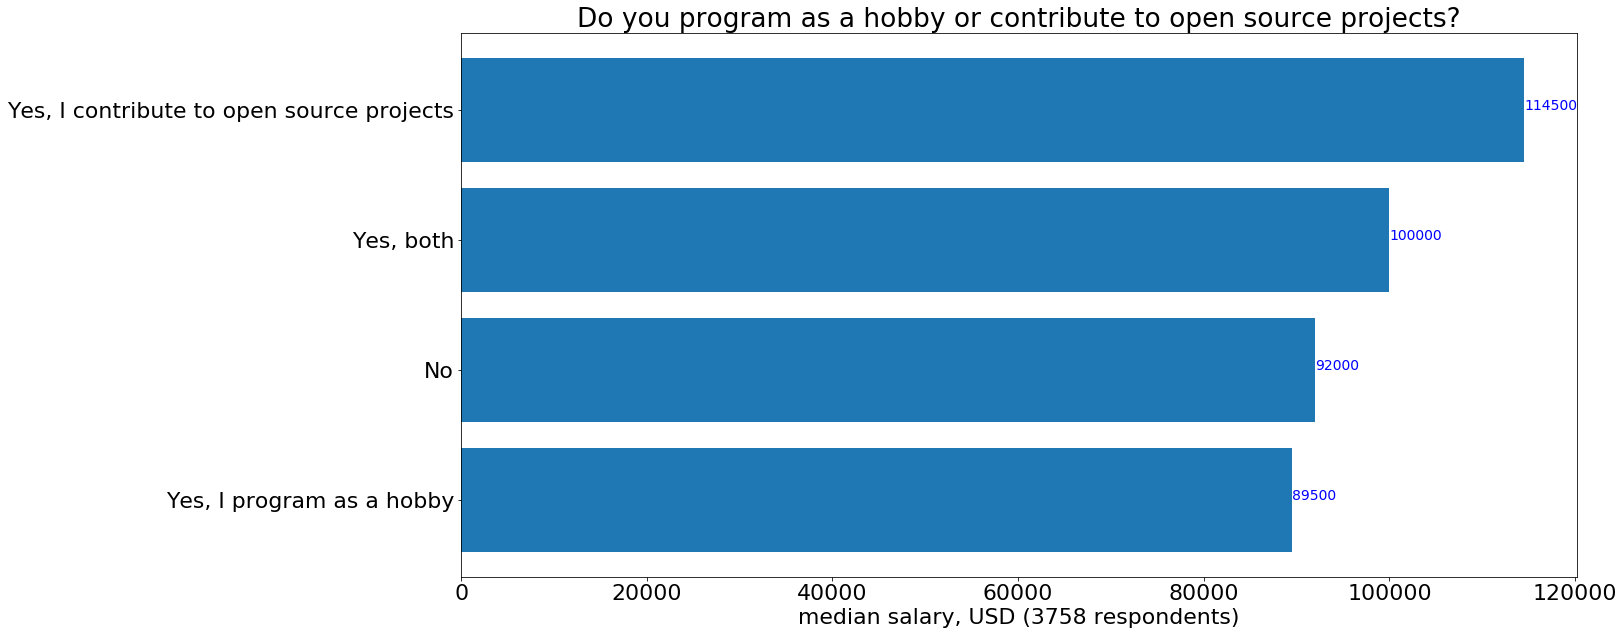

In [1288]:
xs = result[QUESTION_FIELD]
xpos = np.arange(len(xs))[::-1]
ys = result[(SALARY_FIELD, AGG_FN)]
fig, ax = plt.subplots()    
plt.barh(xpos, ys)
plt.yticks(xpos, xs)
plt.xlabel('%s %s, USD (%d respondents)' % (AGG_FN, SALARY_FIELD.lower(), num_respondents))
plt.title(qs[QUESTION_FIELD])
for i, v in enumerate(ys):
    plt.text(v, len(ys) - 1 - i, '%d' % (int(v)), color='blue', fontweight='normal', fontsize=14)
plt.show()

In [1289]:
groupby.std()

,Salary
ProgramHobby,
No,31644.323193
"Yes, I contribute to open source projects",34763.399303
"Yes, I program as a hobby",33090.205987
"Yes, both",35859.841506


In [1290]:
groupby.median()

,Salary
ProgramHobby,
No,92000.0
"Yes, I contribute to open source projects",114500.0
"Yes, I program as a hobby",89500.0
"Yes, both",100000.0


In [1291]:
groupby.min()

,Salary
ProgramHobby,
No,20000.0
"Yes, I contribute to open source projects",12000.0
"Yes, I program as a hobby",10000.0
"Yes, both",12000.0


In [1292]:
groupby.max()

,Salary
ProgramHobby,
No,197000.0
"Yes, I contribute to open source projects",188000.0
"Yes, I program as a hobby",195000.0
"Yes, both",195000.0
